In [ ]:
!pip install qiskit qiskit_aer
!pip install pylatexenc --quiet

In [ ]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
# Universal Visualization Helper (mpl fallback)
def show_circuit(qc):
    """Display circuit using 'mpl' if available, else text fallback."""
    try:
        fig = qc.draw(output='mpl')
        fig.savefig("circuit.png")
        display(Image("circuit.png"))
    except Exception:
        print(qc.draw('text'))


#  Oracle
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # multi-controlled X
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)


#  Diffuser
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

#  Grover’s Search Builder
def grover_search(marked_state, iterations=1):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))  # create equal superposition

    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)

    qc.measure(range(n), range(n))
    return qc


#  Runner
def run_grover(qc):
    """Execute and display results with histogram."""
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    result = sim.run(tqc, shots=1024).result()
    counts = result.get_counts()

    display(plot_histogram(counts))
    print("Measurement results:", counts)
    print("Most probable state:", max(counts, key=counts.get))


TASK 1;


Searching for marked state: 001
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐          ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


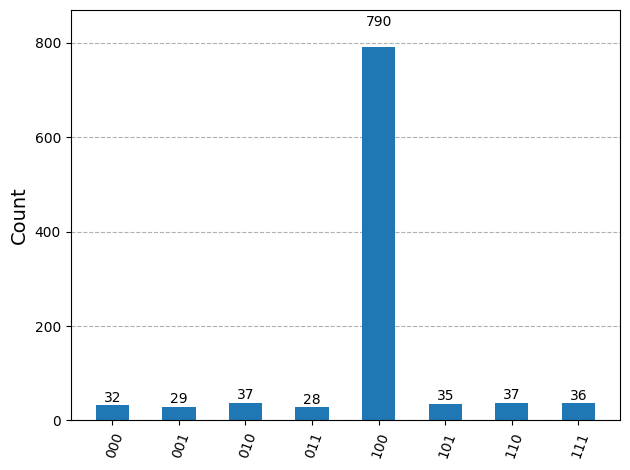

Measurement results: {'001': 29, '111': 36, '011': 28, '101': 35, '000': 32, '010': 37, '100': 790, '110': 37}
Most probable state: 100

Searching for marked state: 111
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


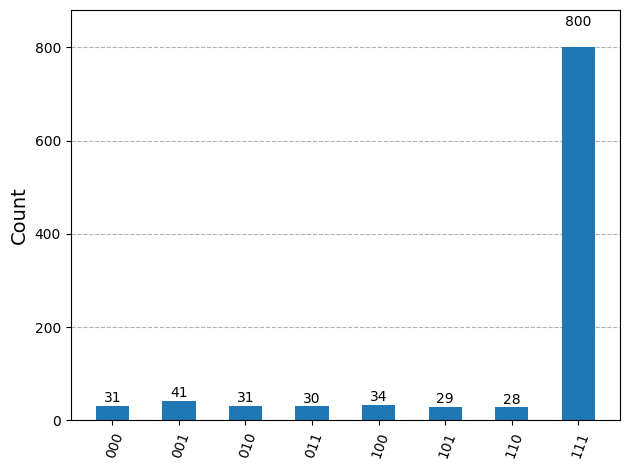

Measurement results: {'100': 34, '110': 28, '010': 31, '000': 31, '101': 29, '001': 41, '011': 30, '111': 800}
Most probable state: 111

Searching for marked state: 010
     ┌───┐┌───┐          ┌───┐┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/══════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                       0  1  2 


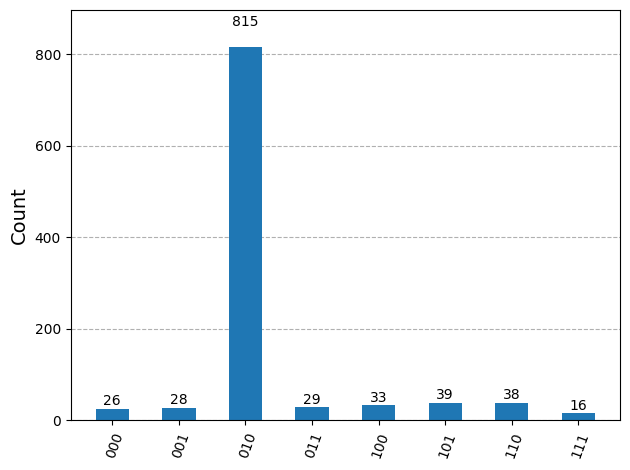

Measurement results: {'111': 16, '011': 29, '110': 38, '100': 33, '101': 39, '001': 28, '000': 26, '010': 815}
Most probable state: 010


In [ ]:
for marked_state in ["001", "111", "010"]:
    print(f"\nSearching for marked state: {marked_state}")
    qc = grover_search(marked_state)
    show_circuit(qc)
    run_grover(qc)


TASK 2:


Searching for marked state in 4-qubit system: 1010
     ┌───┐               ┌───┐┌───┐                    ┌───┐┌───┐     ┌─┐      »
q_0: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─────┤M├──────»
     ├───┤┌───┐       │  ├───┤├───┤┌───┐            │  ├───┤├───┤     └╥┘┌─┐   »
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───»
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤      ║ └╥┘┌─┐»
q_2: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫──╫─┤M├»
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘»
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ »
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                       0  1  2 »
«        
«q_0: ───
«        
«q_1: ───
«        
«q_2: ─

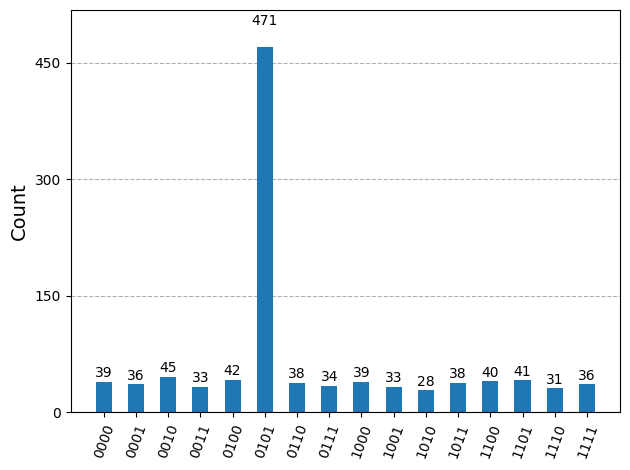

Measurement results: {'1101': 41, '0011': 33, '0111': 34, '1011': 38, '0100': 42, '1110': 31, '0000': 39, '0010': 45, '1010': 28, '0001': 36, '1111': 36, '0101': 471, '1001': 33, '1100': 40, '1000': 39, '0110': 38}
Most probable state: 0101


In [ ]:
#Extend Grover’s algorithm to 4 qubits
marked_state = "1010"
print(f"\nSearching for marked state in 4-qubit system: {marked_state}")
qc = grover_search(marked_state)
show_circuit(qc)
run_grover(qc)



TASK 3:


Multiple Iterations for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐»
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├»
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤»
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├»
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c: 3/══════════════════════════════════════════════════════════════════════»
                                                                           »
«     ┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               »
«q_0: ┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──»
«     ├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  »
«q_1: ┤ H ├┤ X ├───────■──┤ X 

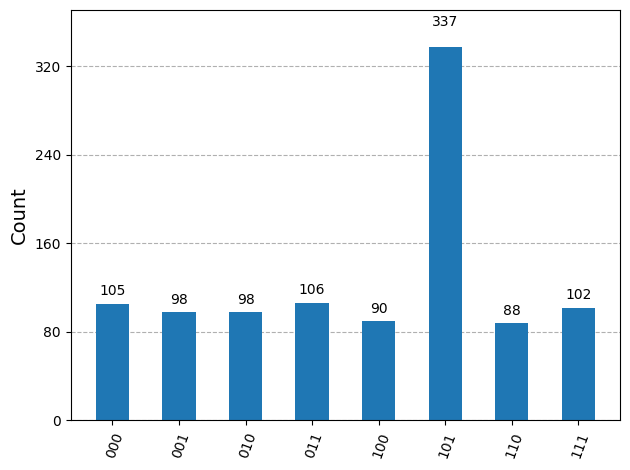

Measurement results: {'100': 90, '001': 98, '110': 88, '011': 106, '111': 102, '101': 337, '000': 105, '010': 98}
Most probable state: 101


In [ ]:
#Apply Oracle + Diffuser multiple times to amplify amplitude
marked_state = "101"
print(f"\nMultiple Iterations for marked state: {marked_state}")
qc = grover_search(marked_state, iterations=3)
show_circuit(qc)
run_grover(qc)


TASK 4:

In [ ]:
marked_state = "101"
qc = grover_search(marked_state)
show_circuit(qc)


     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


TASK 5:

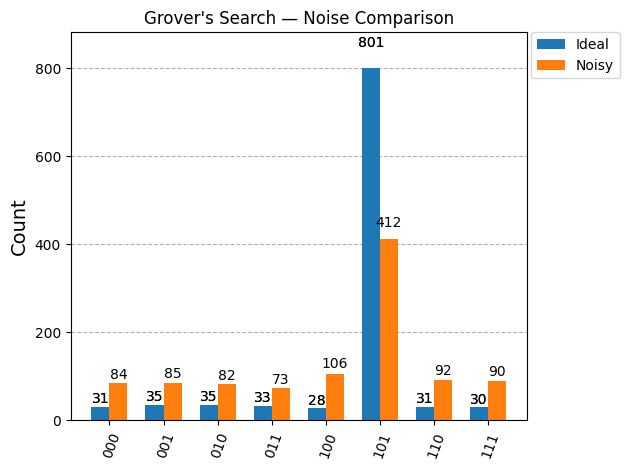

In [ ]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Define noise model
noise_model = NoiseModel()
depol1 = depolarizing_error(0.02, 1)
depol2 = depolarizing_error(0.05, 2)
noise_model.add_all_qubit_quantum_error(depol1, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depol2, ['cx'])

# Run ideal vs noisy
marked_state = "101"
qc = grover_search(marked_state)

ideal_sim = AerSimulator()
noisy_sim = AerSimulator(noise_model=noise_model)

tqc_ideal = transpile(qc, ideal_sim)
tqc_noisy = transpile(qc, noisy_sim)

res_ideal = ideal_sim.run(tqc_ideal, shots=1024).result()
res_noisy = noisy_sim.run(tqc_noisy, shots=1024).result()

counts_ideal = res_ideal.get_counts()
counts_noisy = res_noisy.get_counts()

display(plot_histogram([counts_ideal, counts_noisy],
                       legend=['Ideal', 'Noisy'],
                       title="Grover's Search — Noise Comparison"))
